In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load dataset
df = pd.read_csv('/content/postings.csv')

# Handle missing values by dropping rows with missing data
df.dropna(inplace=True)

# Drop unnecessary columns
df = df[['job_title','company','job_location','job level', 'job_type','job_skills']]

# Resulting dataframe
df.sample()


,job_title,company,job_location,job level,job_type,job_skills
5111,"Senior Financial Analyst - Power BI, Qlik, Tab...",CyberCoders,"Oriskany, NY",Mid senior,Onsite,"Accounting, Finance, Tableau, Power BI, ERP sy..."


In [18]:
# View column information to see what should be included, excluded, and if column types needs to be changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12705 entries, 1 to 12893
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     12705 non-null  object
 1   company       12705 non-null  object
 2   job_location  12705 non-null  object
 3   job level     12705 non-null  object
 4   job_type      12705 non-null  object
 5   job_skills    12705 non-null  object
dtypes: object(6)
memory usage: 694.8+ KB


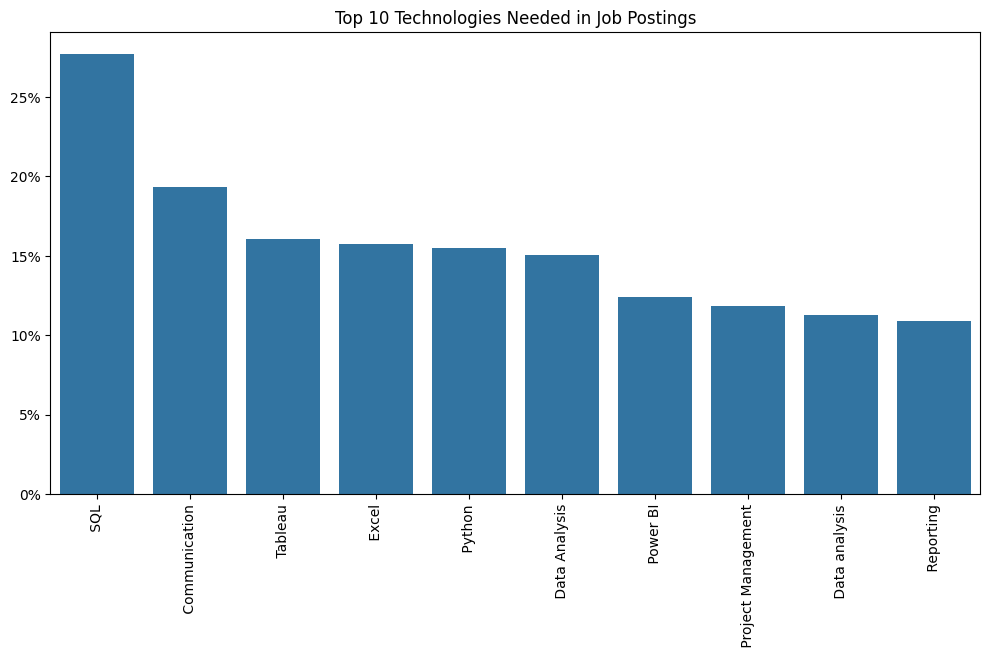

In [19]:
# Bar graph of technologies needed as a percentage of job postings (top 10 results)
total_jobs = len(df)
skills_series = df['job_skills'].str.split(',').explode().value_counts()
skills_percentage = (skills_series / total_jobs) * 100

# Select top 10 technologies
top_10_skills = skills_percentage.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_skills.index, y=top_10_skills.values)
plt.xticks(rotation=90)
plt.title('Top 10 Technologies Needed in Job Postings')
plt.xlabel('')
plt.ylabel('')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.show()

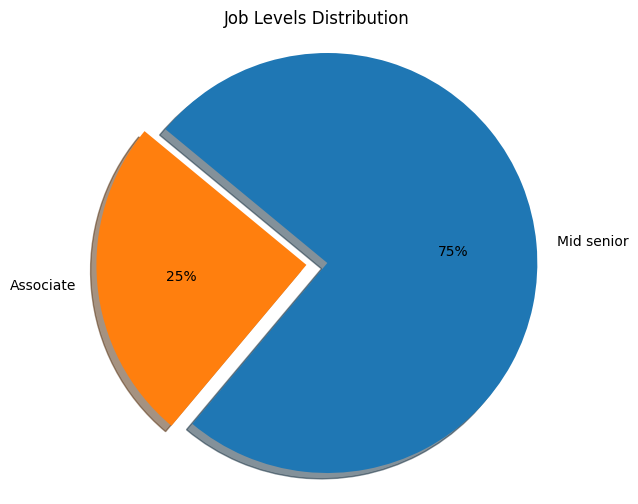

In [20]:
# Pie chart of job levels
job_level_series = df['job level'].value_counts()

# Define explode values
explode = [0.1 if i == job_level_series.idxmax() else 0 for i in job_level_series.index]

plt.figure(figsize=(6, 6))
plt.pie(job_level_series, labels=job_level_series.index, autopct='%1.0f%%', startangle=230, explode=explode, shadow=True)
plt.title('Job Levels Distribution')
plt.axis('equal')
plt.show()